# **Sleep Health Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
data=pd.read_csv('/content/sleep_health_lifestyle_dataset.csv')

In [ ]:
#Data Preprocessing
data[['Systolic BP','Diastolic BP']]= data['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(int)
data.drop(columns=['Blood Pressure (systolic/diastolic)','Person ID'], inplace=True)

In [ ]:
#Check for missing data
print("Missing values per column:\n",data.isnull().sum())

Missing values per column:
 Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
Systolic BP                                0
Diastolic BP                               0
dtype: int64


In [ ]:
#Exploratory Data Analysis
print(data.describe())

              Age  Sleep Duration (hours)  Quality of Sleep (scale: 1-10)  \
count  400.000000              400.000000                      400.000000   
mean    39.950000                8.041250                        6.125750   
std     14.038883                2.390787                        1.975733   
min     18.000000                4.100000                        1.000000   
25%     29.000000                5.900000                        4.700000   
50%     40.000000                8.200000                        6.100000   
75%     49.000000               10.125000                        7.425000   
max     90.000000               12.000000                       10.000000   

       Physical Activity Level (minutes/day)  Stress Level (scale: 1-10)  \
count                             400.000000                   400.00000   
mean                               64.985000                     5.47250   
std                                32.297874                     2.80873   
mi

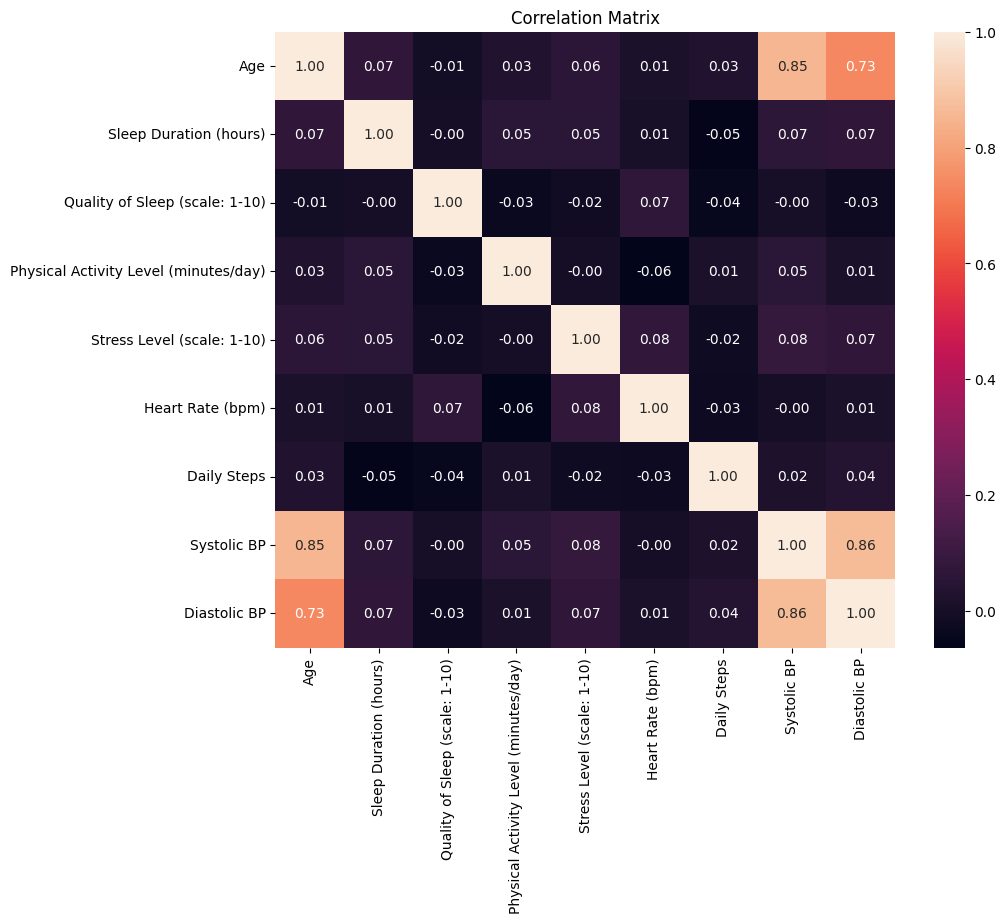

In [ ]:
#Correlation Matrix
#Correlation Matrix
plt.figure(figsize=(10,8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

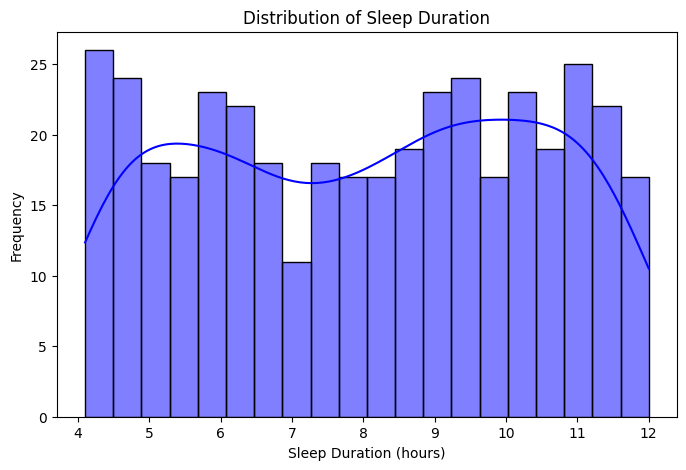

In [ ]:
# 4.1 Sleep Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Sleep Duration (hours)'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-d1129262f929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Stress Level (scale: 1-10)', data=data, palette='Set2')


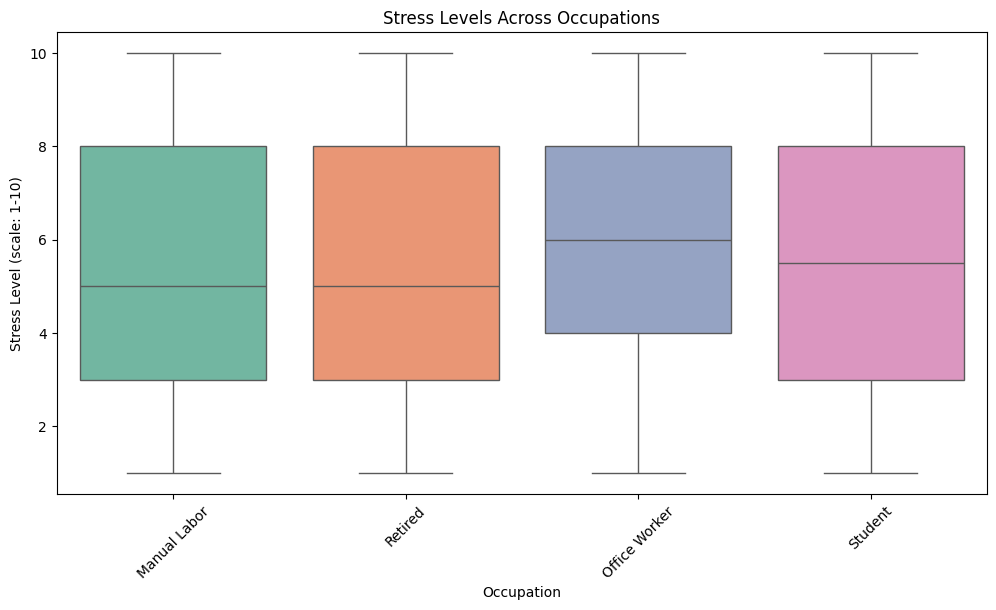

In [ ]:
# 4.2 Stress Levels by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Stress Level (scale: 1-10)', data=data, palette='Set2')
plt.title('Stress Levels Across Occupations')
plt.xticks(rotation=45)
plt.show()

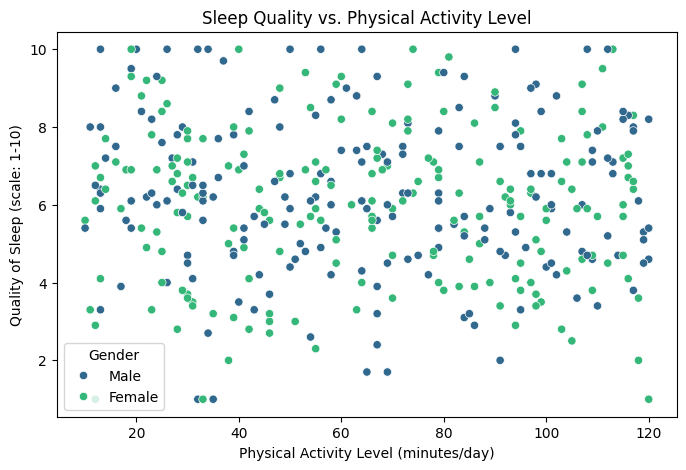

In [ ]:
# 4.3 Sleep Quality vs. Physical Activity
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Physical Activity Level (minutes/day)',
                y='Quality of Sleep (scale: 1-10)', hue='Gender', data=data, palette='viridis')
plt.title('Sleep Quality vs. Physical Activity Level')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Quality of Sleep (scale: 1-10)')
plt.show()

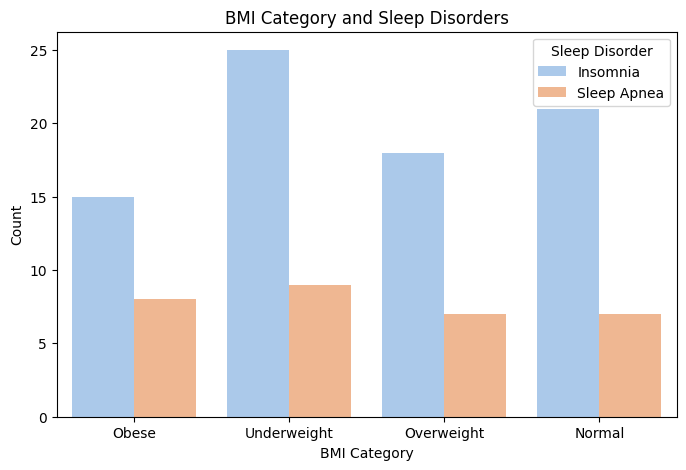

In [ ]:
# 4.4 BMI Category and Sleep Disorders
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=data, palette='pastel')
plt.title('BMI Category and Sleep Disorders')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()